# Stellar Atmosphere Testing

Started 15 July 2019. This module is meant to test stellar atmosphere files to determine units, determine compatibility with existing code, etc.

In [108]:
import numpy as np
from scipy import optimize
from scipy import interpolate
import astropy.io.fits as fits
import matplotlib.pyplot as plt

In [109]:
G = 6.67259e-8
SIG_SB = 5.67051e-5
M_SUN = 1.99e33
R_SUN = 6.96e10
L_SUN = 3.839e33
h_PLANCK = 6.6260755e-27
c_LIGHT = 2.99792458e10
k_BOLTZ = 1.380658e-16
sec_YEAR = 365*24*60*60

## Entering desired test values

In [120]:
DIREC = '/Users/tonyrodriguez/Documents/Docs/2019 Summer/Stellar Atmospheres/'
TEMP = 9000
GRAV = 1.5
ATMOS_FACTOR = 100

In [121]:
atmos_file = DIREC + 'pr.lte' + str(int(TEMP/ATMOS_FACTOR)) \
                + '-' + str(GRAV) + '-0.0.spec'
txt = open(atmos_file)
fulltxt = txt.readlines()
# Cleaning lines
newtxt = []
for i in range(len(fulltxt)):
    line = fulltxt[i][:-1]
    line = line.split()
    newtxt.append(line)

# Casting as floats
# newtxt = np.array(newtxt).astype(np.float64)
# newtxt2 = np.array(newtxt).astype(np.float64)
newtxt3 = np.array(newtxt).astype(np.float64)

In [122]:
waves, lum = newtxt[:,0], newtxt[:,1]

TypeError: list indices must be integers or slices, not tuple

In [123]:
waves2, lum2 = newtxt2[:,0], newtxt2[:,1]

In [124]:
waves3, lum3 = newtxt3[:,0], newtxt3[:,1]

### Checking to get a reasonable wavelength range

In [125]:
waves[3001] - waves[3000]

2.0

In [126]:
waves2

array([1.000e+01, 1.200e+01, 1.400e+01, ..., 4.997e+05, 4.998e+05,
       4.999e+05])

In [127]:
waves

array([1.0e+01, 1.2e+01, 1.4e+01, ..., 8.5e+06, 9.0e+06, 9.5e+06])

In [128]:
import spectres

In [129]:
two_points = spectres.spectres(np.arange(3000,5000,50), waves, lum)

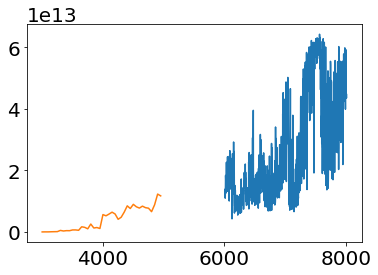

In [130]:
START_IND = 3000
END_IND = 4000
plt.plot(waves[START_IND:END_IND], lum[START_IND:END_IND])
plt.plot(np.arange(3000,5000,50), two_points)

Note that:
$$L_\lambda =A_\text{annulus}\cdot\pi\cdot B_\lambda= A_\text{annulus}\cdot\pi\cdot\dfrac{2hc^2}{\lambda^5}\dfrac{1}{\exp(\frac{hc}{\lambda k_B T}) - 1}$$
where $L_\lambda$ is in erg/sec/cm.

And the stellar atmospheres contain $\pi\cdot B_\lambda$, so no additional factors are needed. Simply multiply the stellar atmosphere by the area of the annulus.

In [131]:
def getBlackbody(wavelength, temp):
    wavelength = wavelength*1e-8
    term1 = 2*h_PLANCK*(c_LIGHT**2)*(wavelength**(-5))*np.pi
    term2 = (np.exp(h_PLANCK*c_LIGHT/(wavelength*k_BOLTZ*temp))-1)**(-1)
    return (wavelength, term1*term2)

In [132]:
TEST_WAVES = np.arange(1000, 20000, 100)
WAVES, LUMS = getBlackbody(TEST_WAVES, 3500)

### Plotting both to compare

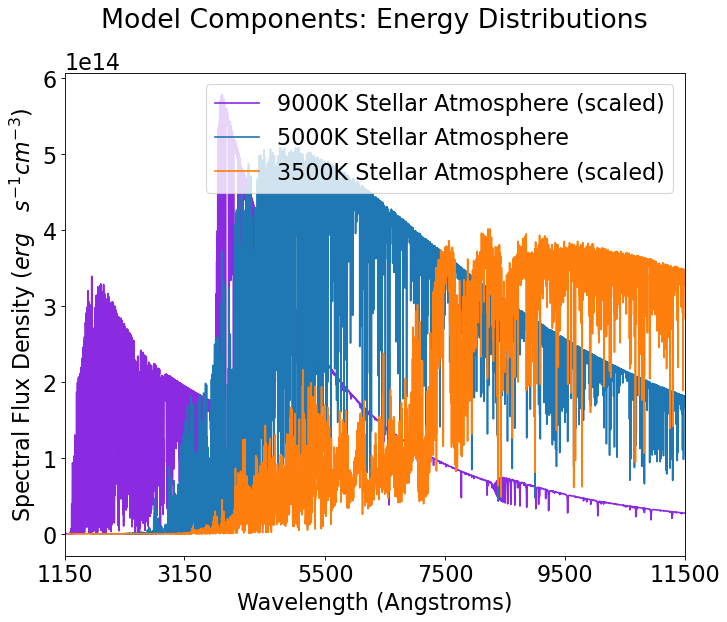

In [146]:
fig=plt.figure(figsize=(10, 8), dpi= 80)
plt.rcParams.update({'font.size': 20})
plt.title('Model Components: Energy Distributions', y=1.08)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel(r'Spectral Flux Density $ (erg\quad s^{-1} cm^{-3})$')



plt.xticks([1150, 3150, 5500, 7500, 9500, 11500])
plt.plot(waves3[START_IND-400-2000:END_IND+400+2000], 0.045*lum3[START_IND-400-2000:END_IND+400+2000],color='blueviolet', label='9000K Stellar Atmosphere (scaled)')
plt.plot(waves2[START_IND-2000:END_IND+400+2200], lum2[START_IND-2000:END_IND+400+2200], label='5000K Stellar Atmosphere')
plt.plot(waves[START_IND-400-2000:END_IND+2000], 6*lum[START_IND-400-2000:END_IND+2000], label='3500K Stellar Atmosphere (scaled)')
plt.xlim(1150, 11500)

# plt.plot(TEST_WAVES, LUMS, 'orange', lw=3.5,label='4000 K Blackbody')
plt.legend()

# plt.savefig("stellaratm_new.png", dpi=200, bbox_inches='tight')

plt.show()